In [179]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [4]:
pd.set_option('display.max_columns',100)

## Reading the dataset:


In [111]:
df = pd.read_excel("C:/Users/lenova/Desktop/GREAT LEARNING/LINEAR REGRESSION/exam_final/kc-house-data-mini-1.xlsx")

In [112]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,20140805T000000,1400000,5,3.0,3850,14990,1.0,0,0,4,9,2290,1560,1964,0,98004,47.6425,-122.218,3010,15001
1,7732500700,20141126T000000,832500,4,2.5,3450,35100,2.0,0,0,3,10,3450,0,1987,0,98052,47.7302,-122.106,3110,35894
2,7851990240,20140717T000000,771150,4,3.5,3950,12320,2.0,0,0,3,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
3,3423049269,20140513T000000,225000,4,1.5,1950,12559,1.5,0,0,3,6,1950,0,1939,0,98188,47.4364,-122.282,1950,9178
4,7852150200,20140923T000000,389950,3,2.5,1700,6396,2.0,0,0,3,7,1700,0,2003,0,98065,47.5333,-121.870,1700,4444


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
id               2001 non-null int64
date             2001 non-null object
price            2001 non-null int64
bedrooms         2001 non-null int64
bathrooms        2001 non-null float64
sqft_living      2001 non-null int64
sqft_lot         2001 non-null int64
floors           2001 non-null float64
waterfront       2001 non-null int64
view             2001 non-null int64
condition        2001 non-null int64
grade            2001 non-null int64
sqft_above       2001 non-null int64
sqft_basement    2001 non-null int64
yr_built         2001 non-null int64
yr_renovated     2001 non-null int64
zipcode          2001 non-null int64
lat              2001 non-null float64
long             2001 non-null float64
sqft_living15    2001 non-null int64
sqft_lot15       2001 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 328.4+ KB


In [9]:
#no of rows
df.shape
# -> 2001 rows

(2001, 21)

In [10]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
print('Cat_cols :',cat_cols)
print()
num_cols=list(df.select_dtypes(include=['float64','int64']).columns)
print('Num_cols :',num_cols)
print()
boo_cols=list(df.select_dtypes(include=['bool']).columns)
print('Boo_cols :',boo_cols)

Cat_cols : ['date']

Num_cols : ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Boo_cols : []


In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.001000e+03,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,4.590975e+09,5.295997e+05,3.347326,2.036982,2037.556222,17846.464268,1.423788,0.004998,0.250375,3.449775,7.560220,1728.725637,308.830585,1966.890055,84.676162,98079.052474,47.561350,-122.215569,1956.869065,15241.781109
std,2.888947e+09,3.437001e+05,0.905982,0.753579,896.279579,47218.111461,0.501312,0.070534,0.807949,0.678676,1.154771,790.018690,459.259858,27.893851,402.134842,53.819947,0.137556,0.141858,673.478504,35224.009024
min,1.120040e+07,8.650000e+04,0.000000,0.500000,470.000000,844.000000,1.000000,0.000000,0.000000,1.000000,4.000000,470.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,399.000000,980.000000
25%,2.114700e+09,3.170000e+05,3.000000,1.500000,1410.000000,5478.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1949.000000,0.000000,98033.000000,47.475800,-122.331000,1460.000000,5325.000000
50%,3.971701e+09,4.500000e+05,3.000000,2.000000,1890.000000,7919.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1969.000000,0.000000,98070.000000,47.573400,-122.233000,1820.000000,7800.000000
75%,7.346600e+09,6.295000e+05,4.000000,2.500000,2470.000000,11085.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1989.000000,0.000000,98118.000000,47.677500,-122.126000,2300.000000,10236.000000
max,9.839301e+09,4.208000e+06,10.000000,8.000000,13540.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2014.000000,2015.000000,98199.000000,47.777500,-121.316000,5500.000000,560617.000000


## Univariate Analysis:

Text(0, 0.5, 'Frequency of bedrooms')

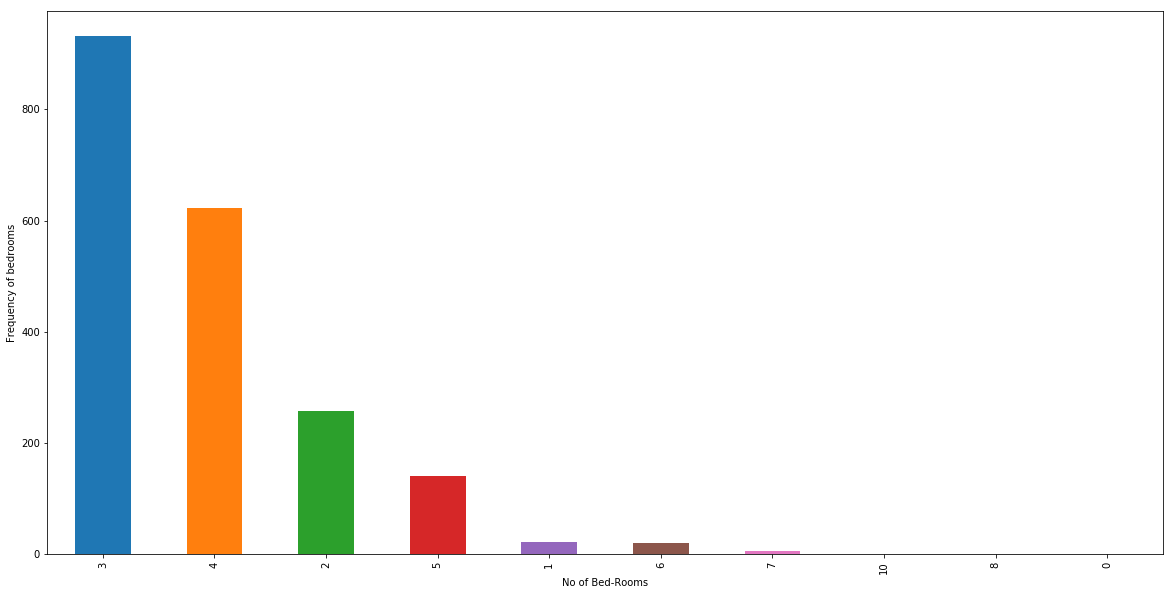

In [18]:
plt.figure(figsize = (20,10))
df['bedrooms'].value_counts().plot.bar()
plt.xlabel("No of Bed-Rooms")
plt.ylabel("Frequency of bedrooms")

## Bivariate Analysis:


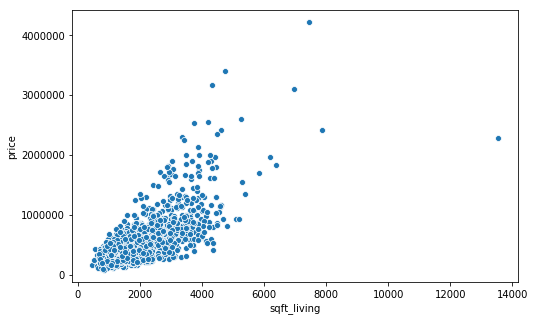

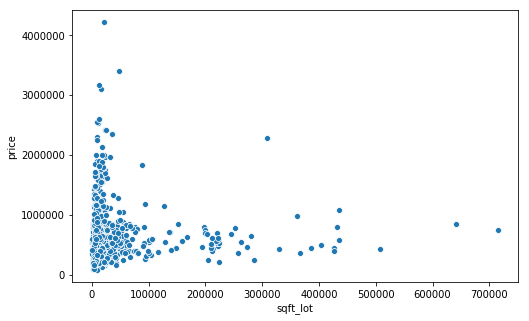

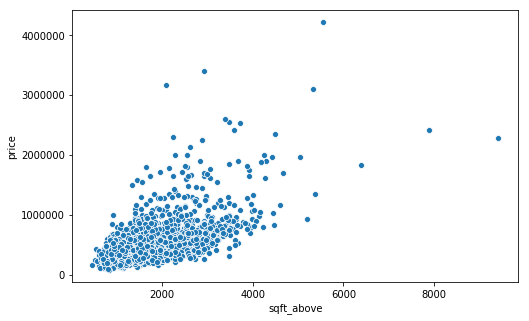

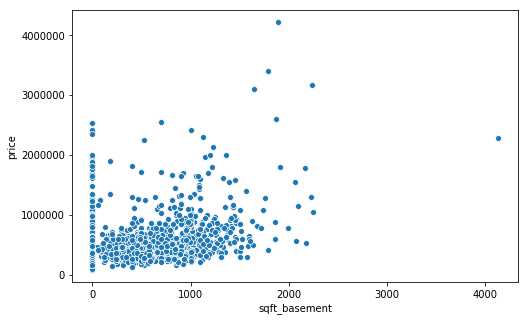

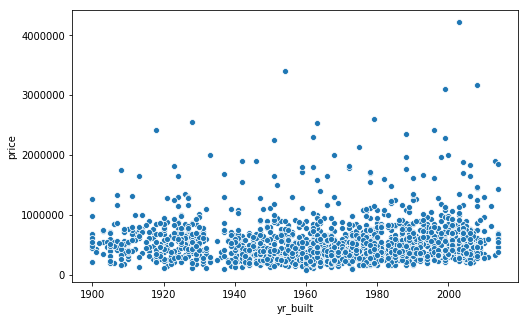

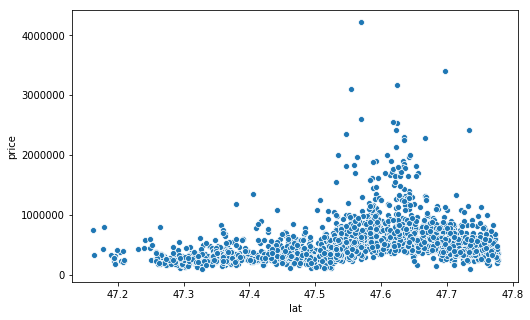

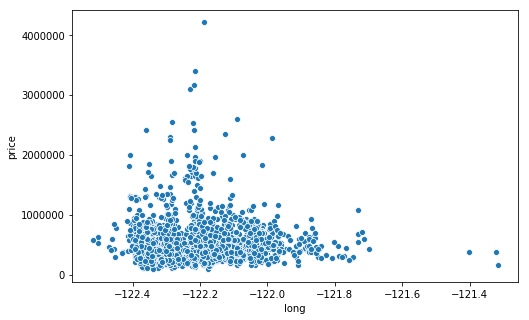

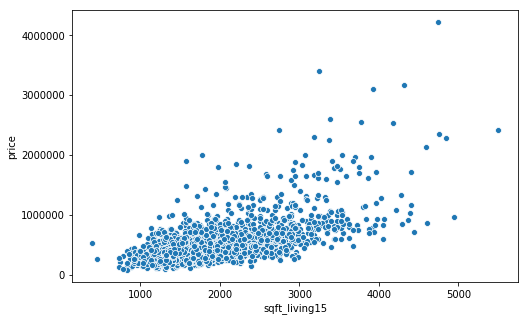

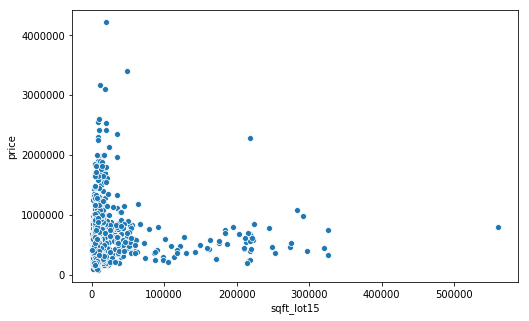

In [109]:

h = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15']
for i in h:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x = df[i],y = df['price'])
    plt.show()

## Correlation Analysis:

In [19]:
y = df.corr()

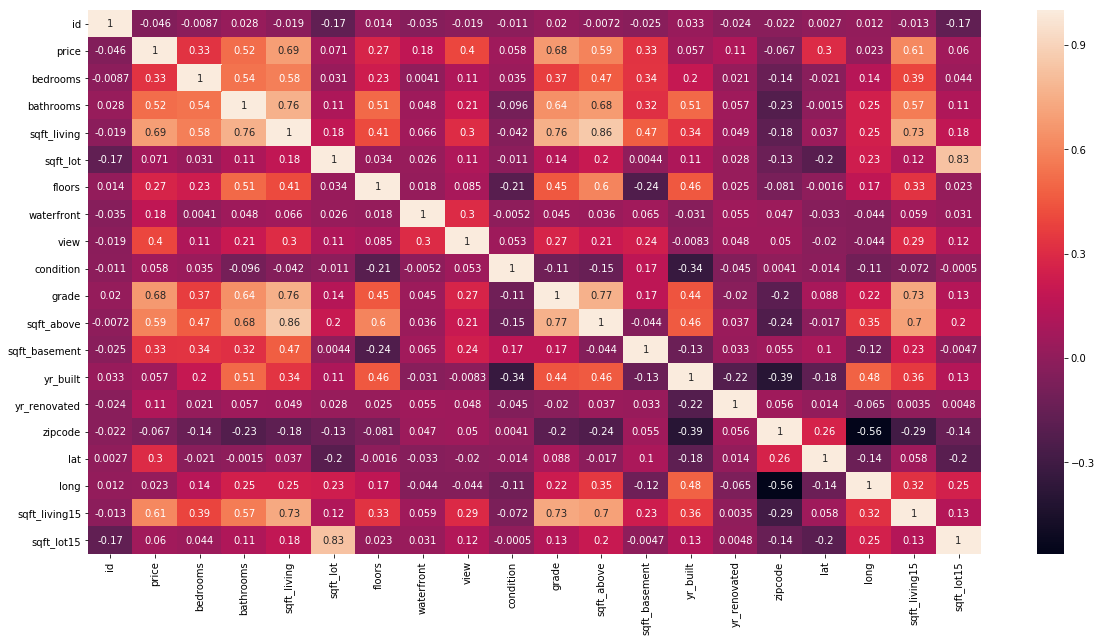

In [21]:
plt.figure(figsize = (20,10))
sns.heatmap(y,annot= True)

In [44]:
#order of variables with high correlation with respect to the target variable
y['price'].sort_values(ascending = False)[1:]
#sqft_living,grade,sqft_living15,sqft_above,bathrooms,view,bedrooms


sqft_living      0.693583
grade            0.675114
sqft_living15    0.614607
sqft_above       0.594260
bathrooms        0.517750
view             0.398001
bedrooms         0.331621
sqft_basement    0.331332
lat              0.300163
floors           0.267308
waterfront       0.175374
yr_renovated     0.111798
sqft_lot         0.071093
sqft_lot15       0.060176
condition        0.058438
yr_built         0.057282
long             0.022749
id              -0.046067
zipcode         -0.067074
Name: price, dtype: float64

### the columns id and zipcode and date are not needed and can be dropped.


In [122]:
g = df.drop(["id",'zipcode','date'],axis = 1)

In [123]:
g.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,1400000,5,3.0,3850,14990,1.0,0,0,4,9,2290,1560,1964,0,47.6425,-122.218,3010,15001
1,832500,4,2.5,3450,35100,2.0,0,0,3,10,3450,0,1987,0,47.7302,-122.106,3110,35894


## no of bedrooms vs price:

Text(0.5, 1.0, 'bedrooms vs sum of prices')

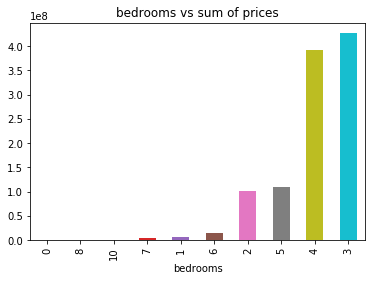

In [60]:
v = g.groupby(['bedrooms'])['price'].sum().sort_values()
v.plot.bar()
plt.title("bedrooms vs sum of prices")


### 3 bedroom houses have been sold the most 

## No of Bedrooms vs Price:

Text(0.5, 1.0, 'Bedrooms Vs median-price')

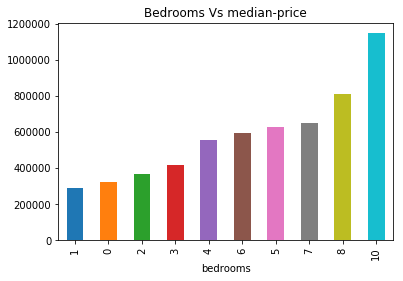

In [62]:
v = g.groupby(['bedrooms'])['price'].median().sort_values()
v.plot.bar()
plt.title("Bedrooms Vs median-price")

### the median price of 10 bedroom house is high

Text(0.5, 1.0, 'Bedrooms vs mean-price')

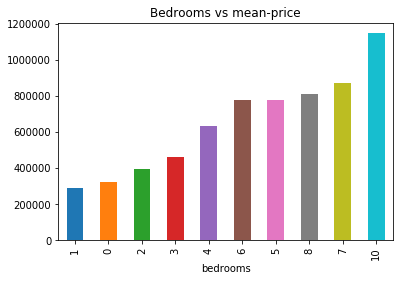

In [63]:
v = g.groupby(['bedrooms'])['price'].mean().sort_values()
v.plot.bar()
plt.title("Bedrooms vs mean-price")

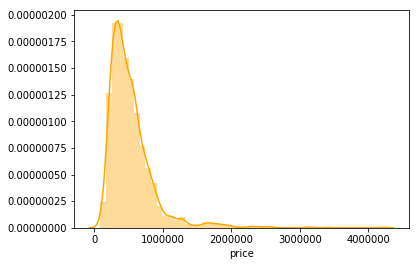

In [124]:
sns.distplot(g['price'],color = 'orange')

In [125]:
# it can be transformed by doing log transformation
print("Before Transformation")
print(g['price'].describe())
print()
print("After Transformation")
g['price'] = np.log(g['price'])


Before Transformation
count    2.001000e+03
mean     5.295997e+05
std      3.437001e+05
min      8.650000e+04
25%      3.170000e+05
50%      4.500000e+05
75%      6.295000e+05
max      4.208000e+06
Name: price, dtype: float64

After Transformation


In [126]:
g['price'].describe()

count    2001.000000
mean       13.032458
std         0.523613
min        11.367900
25%        12.666657
50%        13.017003
75%        13.352681
max        15.252498
Name: price, dtype: float64

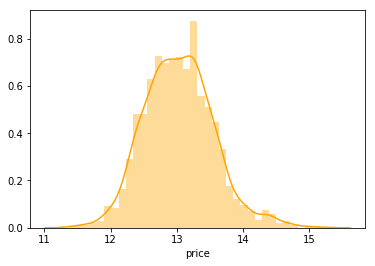

In [127]:
sns.distplot(g['price'],color = 'orange')
#now the target variable plot is more normally distributed

## Check for Missing/Null values:

In [69]:
(g.isnull().sum()/g.shape[0])*100
# no null values found

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

## Check for Outliers:

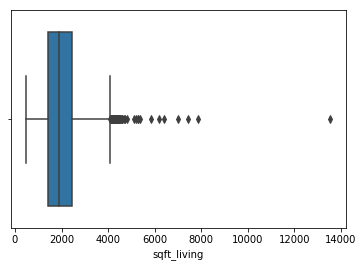

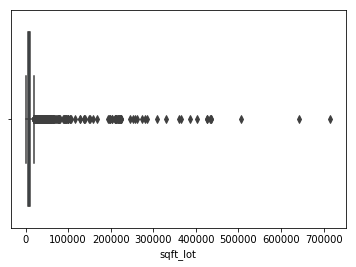

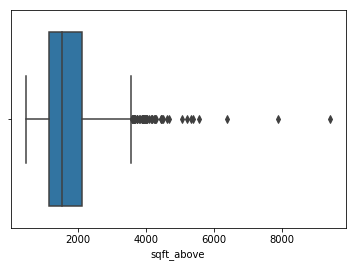

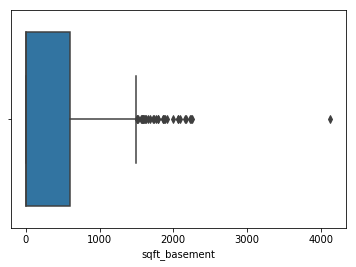

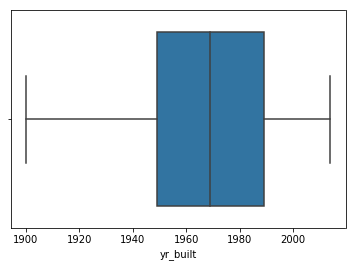

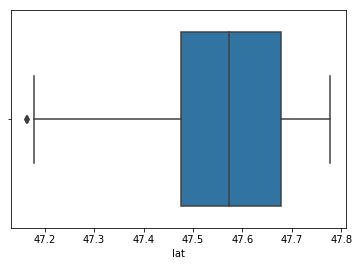

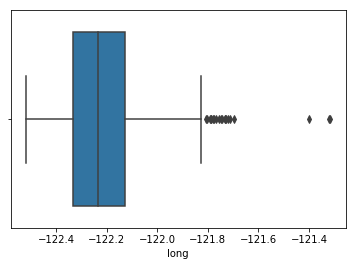

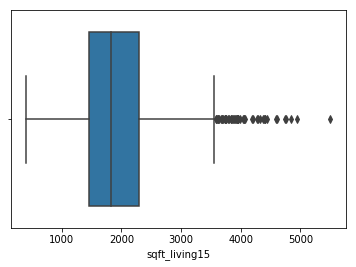

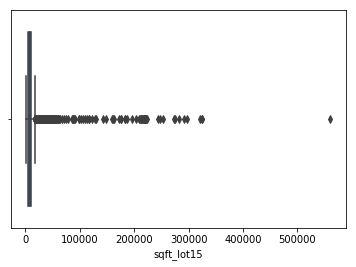

In [81]:
for i in h:
    sns.boxplot(g[i])
    plt.show()

### there are many outliers in sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15

## Distribution Analysis:

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


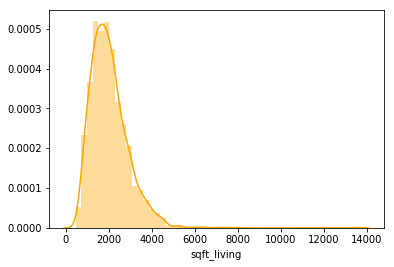

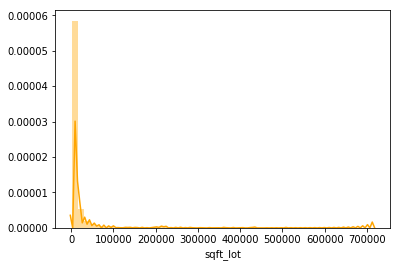

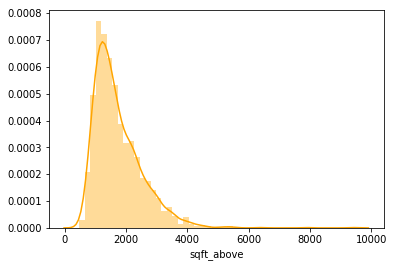

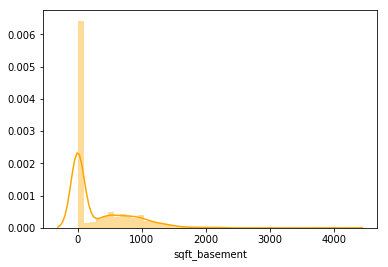

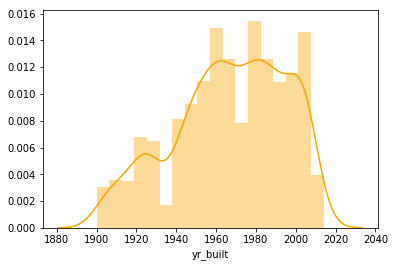

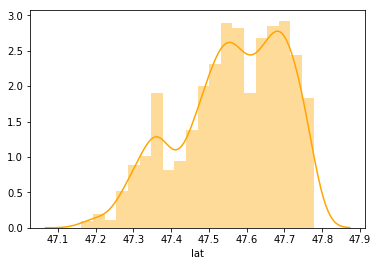

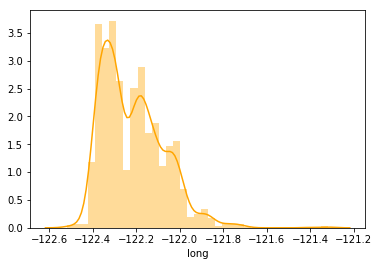

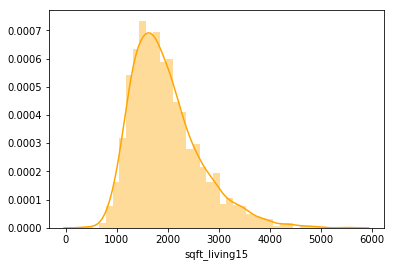

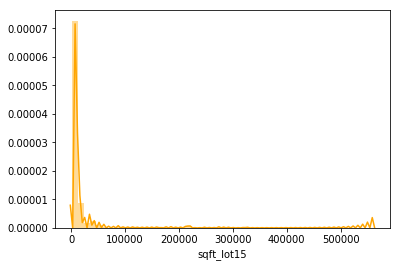

In [82]:
for i in h:
    sns.distplot(g[i],color = 'orange')
    plt.show()

## Log Transformation:

In [128]:
h1 = ['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']
for i in h1:
    g[i] = np.log(g[i])
    

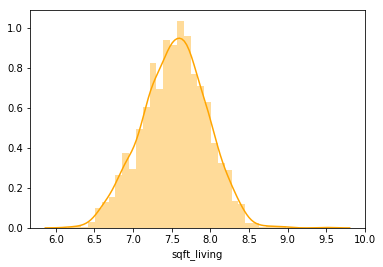

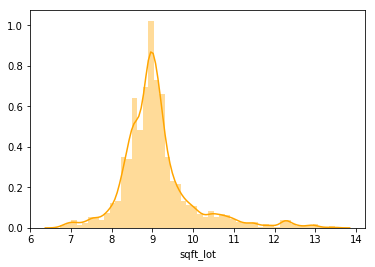

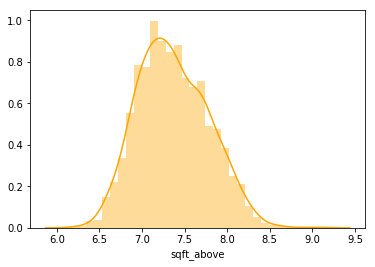

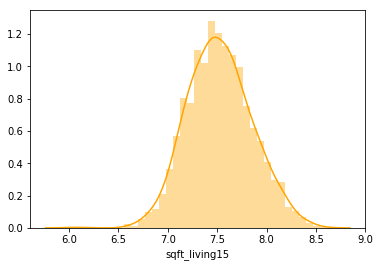

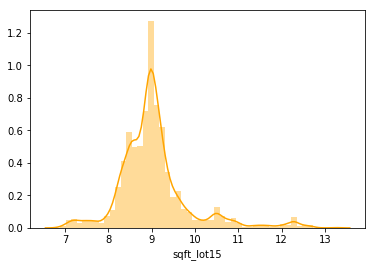

In [129]:
for i in h1:
    sns.distplot(g[i],color = 'orange')
    plt.show()

## Train and Test Split:


In [130]:
g.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,14.151983,5,3.0,8.255828,9.615139,1.0,0,0,4,9,7.736307,1560,1964,0,47.6425,-122.218,8.009695,9.615872
1,13.632189,4,2.5,8.146130,10.465956,2.0,0,0,3,10,8.146130,0,1987,0,47.7302,-122.106,8.042378,10.488325


In [131]:
y = g['price']
x = g.drop('price',axis =1)

In [132]:
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1400, 17)
(601, 17)
(1400,)
(601,)


## Base Model Creation:

In [137]:
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.7577538807122606
R^2 score for test: 0.7515676665086612


In [136]:
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     364.6
Date:                Wed, 18 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:                -126.23
No. Observations:                2001   AIC:                             288.5
Df Residuals:                    1983   BIC:                             389.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -51.2136      7.191     -7.122      0.000     -65.317     -37.110
bedrooms         -0.0220      0.008     -2.585      0.010      -0.039      -0.005
bathrooms         0.0762      0.014      5.397      0.000       0.049       0.104
sqft_living       0.2256      0.075      3.008      0.003       0.079       0.373
sqft_lot          0.0310      0.016      1.888      0.059      -0.001       0.063
floors            0.0293      0.018      1.667      0.096      -0.005       0.064
waterfront        0.3160      0.087      3.650      0.000       0.146       0.486
view              0.0741      0.008      9.065      0.000       0.058       0.090
condition         0.0719      0.009      7.674      0.000       0.054       0.090
grade             0.1614      0.009     17.997      0.000       0.144       0.179
sqft_above        0.1023      0.070      1.460      0.145      -0.035       0.240
sqft_basement   2.87e-05   3.73e-05      0.769      0.442   -4.45e-05       0.000
yr_built         -0.0036      0.000    -11.003      0.000      -0.004      -0.003
yr_renovated   5.715e-05   1.54e-05      3.711      0.000    2.69e-05    8.74e-05
lat               1.3343      0.046     29.283      0.000       1.245       1.424
long             -0.0176      0.052     -0.336      0.737      -0.120       0.085
sqft_living15     0.2339      0.029      8.145      0.000       0.178       0.290
sqft_lot15       -0.0457      0.017     -2.621      0.009      -0.080      -0.012
==============================================================================
Omnibus:                       36.368   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.797
Skew:                           0.041   Prob(JB):                     4.23e-16
Kurtosis:                       3.918   Cond. No.                     2.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The overall R^2 is approximately 75% 



In [134]:
model = lin_reg.fit(xtest,ytest)
print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.7417324638167038
R^2 score for test: 0.766274533073927


## Check for Multicollinearity:

In [139]:

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T
# if no features are correlated then the vif value will be 1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
vif,1.767005,3.380317,29.236897,6.431251,2.311959,1.113275,1.301302,1.208206,3.200913,25.16269,8.758021,2.482746,1.144544,1.172318,1.649106,2.668317,6.287021


### from above we can see that many variables have values much higher than 1. So, multi-collinearity exists

# Feature Selection

## backward elimination

In [146]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const             1.486734e-12
bedrooms          9.800417e-03
bathrooms         7.573950e-08
sqft_living       2.658890e-03
sqft_lot          5.914628e-02
floors            9.571110e-02
waterfront        2.694561e-04
view              2.922893e-19
condition         2.601497e-14
grade             3.391365e-67
sqft_above        1.445297e-01
sqft_basement     4.417968e-01
yr_built          2.248960e-27
yr_renovated      2.122783e-04
lat              5.874655e-157
long              7.368362e-01
sqft_living15     6.624206e-16
sqft_lot15        8.826190e-03
dtype: float64

In [147]:
cols = list(x.columns)
cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [155]:

cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'sqft_living15']


In [156]:
#modelling using the above variables
y = g['price']
x = g[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'sqft_living15']]
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.7554707756692729
R^2 score for test: 0.7559790491711056


## Recursive Feature Elimination

In [164]:
#no of features
nof_list=np.arange(1,18)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 12
Score with 12 features: 0.762666


In [170]:
cols = list(x.columns)

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'lat',
       'sqft_living15'],
      dtype='object')


In [171]:
# MODELLING THE DATA
y = g['price']
x = g[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'lat',
       'sqft_living15']]
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.7554707756692729
R^2 score for test: 0.7559790491711056


## using lasso regression

In [177]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
train_score=lasso.score(xtrain,ytrain)
test_score=lasso.score(xtest,ytest)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.011606908622583513
test score:  0.012399455795504388
number of features used:  2


In [178]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(xtrain,ytrain)
train_score001=lasso001.score(xtrain,ytrain)
test_score001=lasso001.score(xtest,ytest)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.722353074130178
test score for alpha =0.01:  0.7316247087414541
number of features used: for alpha =0.01: 10


In [180]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(xtrain,ytrain)
train_score00001=lasso00001.score(xtrain,ytrain)
test_score00001=lasso00001.score(xtest,ytest)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7554613479155783
test score for alpha =0.0001:  0.7559573801114642
number of features used: for alpha =0.0001: 12


## using Correlation 

In [210]:
v1 = g.corr()
print(v1['price'].sort_values(ascending = False)[1:])

#Selecting highly correlated features with respect to the model
relevant_features = v1['price'][v1['price']>0.2]
relevant_features = relevant_features[1:]

relevant_features


grade            0.689661
sqft_living      0.668462
sqft_living15    0.613554
sqft_above       0.574094
bathrooms        0.536164
lat              0.427787
view             0.351371
bedrooms         0.347984
sqft_basement    0.321151
floors           0.309725
sqft_lot         0.123930
waterfront       0.117705
yr_renovated     0.107813
sqft_lot15       0.097240
condition        0.075787
yr_built         0.069787
long             0.056682
Name: price, dtype: float64


bedrooms         0.347984
bathrooms        0.536164
sqft_living      0.668462
floors           0.309725
view             0.351371
grade            0.689661
sqft_above       0.574094
sqft_basement    0.321151
lat              0.427787
sqft_living15    0.613554
Name: price, dtype: float64

In [211]:
# checking for multi collinearity
x = g[['bedrooms','bathrooms','sqft_living','floors','view','grade','sqft_above','sqft_basement','lat','sqft_living15']]
y = g['price']
X_constant = sm.add_constant(x)
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns)


,vif
bedrooms,1.748595
bathrooms,2.921285
sqft_living,29.016615
floors,1.982103
view,1.166177
grade,3.022384
sqft_above,24.265606
sqft_basement,8.582967
lat,1.049303
sqft_living15,2.534778


### sqft_living and sqft_above are top 2 highest, so there is huge multi-collinearity in order to reduce it, we can remove the second highest value which is sqft_above


In [212]:
# MODELLING THE DATA
y = g['price']
x = g[['bedrooms','bathrooms','sqft_living','floors','view','grade','sqft_basement','lat','sqft_living15']]
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')


R^2 score for train: 0.7053394785213082
R^2 score for test: 0.7197771108327429


## Summarization:

In [215]:
#OVERALL SUMMARY OF THE MODEL
y = g['price']
x = g[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'lat',
       'sqft_living15']]
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     514.4
Date:                Wed, 18 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:29:58   Log-Likelihood:                -131.21
No. Observations:                2001   AIC:                             288.4
Df Residuals:                    1988   BIC:                             361.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -48.9300      2.342    -20.896      0.000     -53.522     -44.338
bedrooms         -0.0208      0.008     -2.452      0.014      -0.037      -0.004
bathrooms         0.0788      0.014      5.791      0.000       0.052       0.106
sqft_living       0.3065      0.031      9.945      0.000       0.246       0.367
floors            0.0472      0.014      3.320      0.001       0.019       0.075
waterfront        0.3096      0.086      3.580      0.000       0.140       0.479
view              0.0736      0.008      9.196      0.000       0.058       0.089
condition         0.0693      0.009      7.426      0.000       0.051       0.088
grade             0.1649      0.009     19.094      0.000       0.148       0.182
yr_built         -0.0037      0.000    -12.603      0.000      -0.004      -0.003
yr_renovated    5.73e-05   1.53e-05      3.735      0.000    2.72e-05    8.74e-05
lat               1.3378      0.044     30.176      0.000       1.251       1.425
sqft_living15     0.2256      0.028      8.086      0.000       0.171       0.280
==============================================================================
Omnibus:                       34.998   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.635
Skew:                           0.049   Prob(JB):                     3.39e-15
Kurtosis:                       3.889   Cond. No.                     7.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### After trying out all the feature selection tests, the best model had an accuracy of 76% and it had 12 features used in it.

### The best model was discovered using
### 1) Recursive feature elimination
### 2) Lasso regression
### and
### 3) backward elimination

### these three complimented each other by producing the same result and thus we can be confident that this is the best model that one can acheive using this dataset

## Business interpretation/explanation of the model:

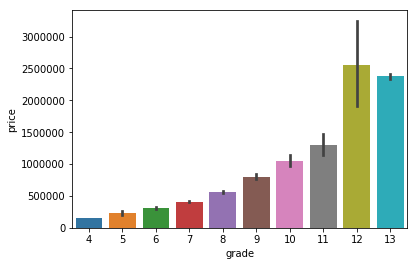

In [223]:
sns.barplot(x = 'grade',y = 'price',data = df)

### as you can see from the above the better grading the houses had the more amount it sold for, so the best thing for the sellers would be to do will be to renovate the houses and get a regrading from the officials and then put it on for sale

### upon applying the lasso regression and other feature selection methods, we were able to increase the accuracy of the model by few percentage, and the model was fit perfectly rather than being overfit or underfit.